# 実習1：手書き数字の画像の分類

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
X = digits.data
y = digits.target

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [5]:
print(X[0])
print(y[0:50])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


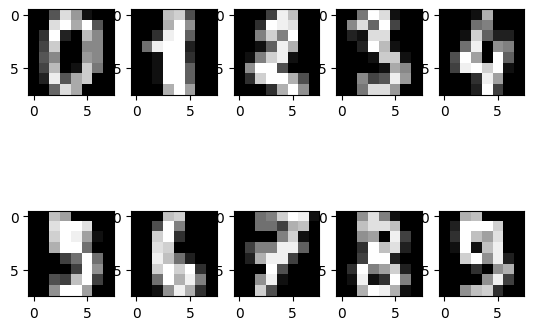

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i, x in enumerate(X[0:10], 0):
    sp = fig.add_subplot(2, 5, (i + 1))
    sp.imshow(x.reshape(8, 8), cmap = "gray")

In [7]:
X_train = X[:1200]
X_test  = X[1200:]
y_train = y[:1200]
y_test  = y[1200:]

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[58  0  0  0  0  0  1  0  0  0]
 [ 0 53  0  0  0  0  1  0  2  5]
 [ 1  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  2  7  0]
 [ 1  0  0  0 57  0  0  0  1  2]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  2  1  0  0  1 50  0]
 [ 0  0  0  1  0  2  0  1  1 53]]


In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.96      0.87      0.91        61
           2       1.00      0.98      0.99        60
           3       0.95      0.84      0.89        62
           4       0.98      0.93      0.96        61
           5       0.95      0.98      0.97        59
           6       0.95      0.98      0.97        61
           7       0.94      1.00      0.97        61
           8       0.82      0.91      0.86        55
           9       0.88      0.91      0.90        58

    accuracy                           0.94       597
   macro avg       0.94      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597

